# Case 10: Backtesting Investment Strategies (US Stocks)

# Importing the Data


In [22]:
import pandas as pd

In [23]:
pd.read_csv("dji.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3333 non-null   object 
 1   Open       3333 non-null   float64
 2   High       3333 non-null   float64
 3   Low        3333 non-null   float64
 4   Close      3333 non-null   float64
 5   Adj Close  3333 non-null   float64
 6   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 182.4+ KB


In [24]:
data=pd.read_csv("dji.csv", parse_dates=["Date"], index_col="Date")

In [25]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3333 entries, 2007-01-03 to 2020-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3333 non-null   float64
 1   High       3333 non-null   float64
 2   Low        3333 non-null   float64
 3   Close      3333 non-null   float64
 4   Adj Close  3333 non-null   float64
 5   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.3 KB


In [27]:
df=data.loc["2010-01-01":"2020-03-31","Close"].to_frame()

In [28]:
df

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430
...,...
2020-03-24,20704.910156
2020-03-25,21200.550781
2020-03-26,22552.169922


# Data Visualization & Returns


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

In [30]:
df.describe()

,Close
count,2577.000000
mean,17820.342520
std,5292.260933
min,9686.480469
25%,13034.490234
50%,17113.150391
75%,21892.429688
max,29551.419922


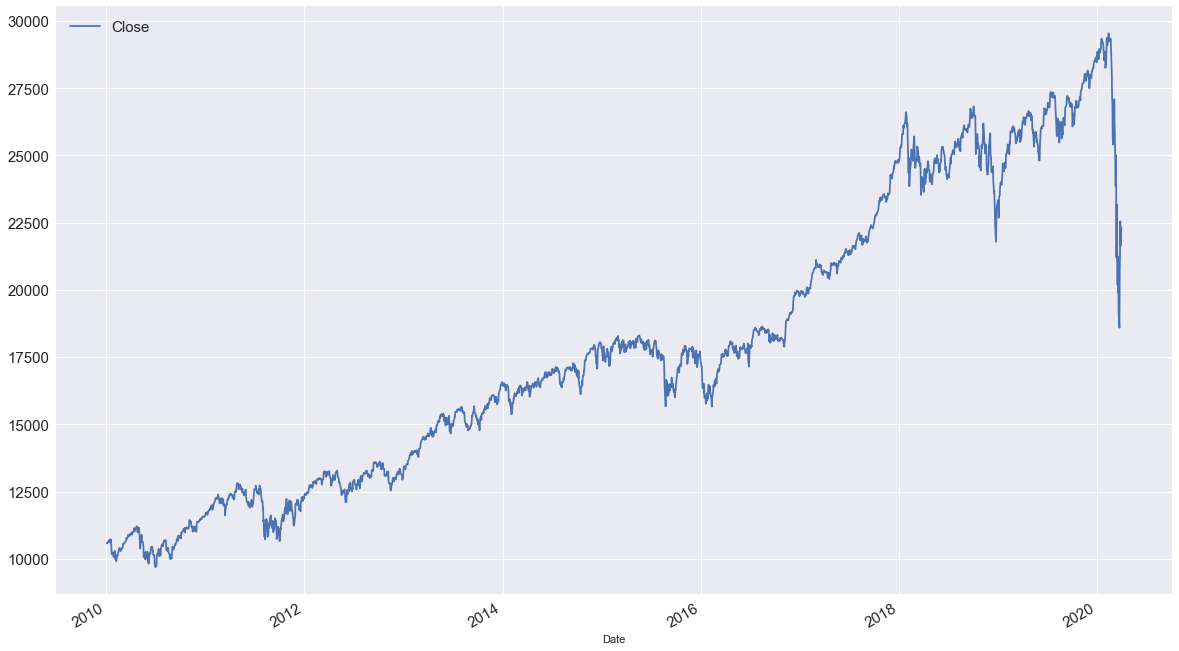

In [31]:
df.plot(figsize=(20,12),fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [32]:
df["Return"]=df.pct_change()

In [33]:
df

,Close,Return
Date,,
2010-01-04,10583.959961,NaN
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [34]:
df.dropna(inplace=True)

In [35]:
df

,Close,Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


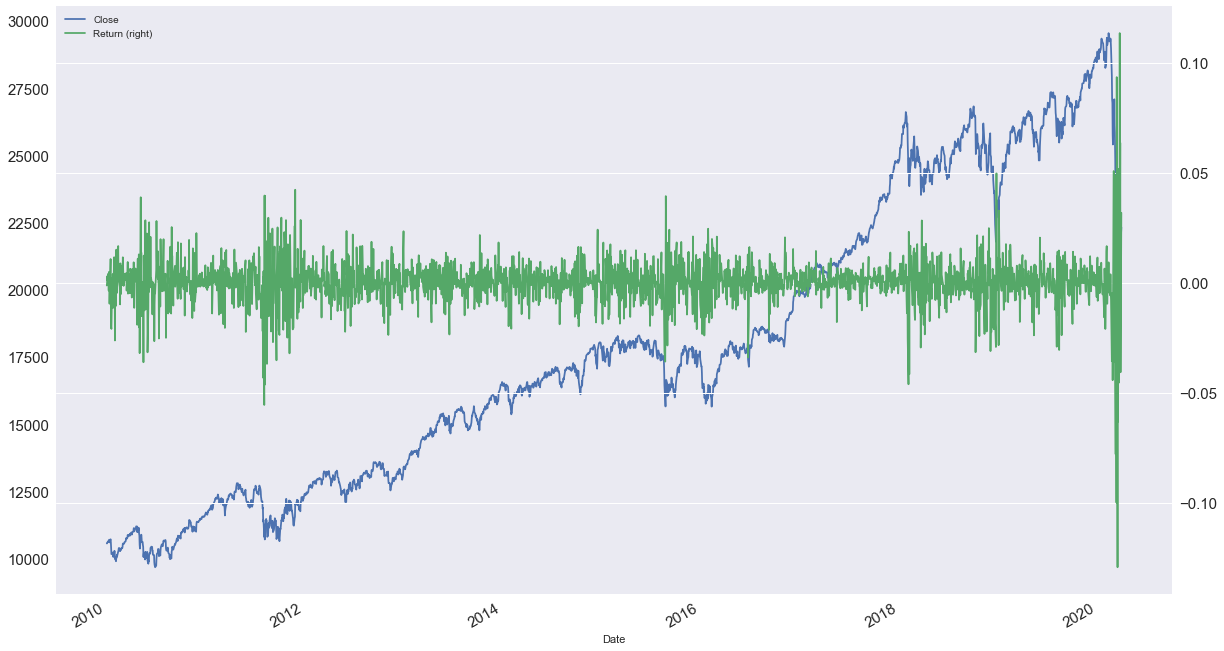

In [36]:
df.plot(figsize=(20,12), secondary_y="Return", mark_right= True, fontsize=15)
plt.show()


In [37]:
df.rename(columns={"Close":"DJI_Close", "Return": "DJI_Return"},inplace=True)

In [38]:
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


# Backtesting a simple Momentum Strategy

__Positions__:

In [39]:
+1: Investing in DJI (long position)
-1: Short Selling DJI (short position)
0: No position (neutral)

SyntaxError: invalid syntax (<ipython-input-39-3bd30bdc62d4>, line 1)

In [40]:
__Strategies__:

SyntaxError: invalid syntax (<ipython-input-40-98c57e6089cf>, line 1)

In [ ]:
-__Buy and Hold__ (Basic Strategy - passive): Initially Investing into DJI and do nothing (Position: +1 
on any given day)

In [ ]:
-__Simple Momentum__ (active Strategy to be tested): <br>
__a) Investing (+1)__ into DJI tomorrow if today´s return was __positive__ <br>
__b) Short selling (-1)__ DJI tomorrow if today´s return was __negative__

In [41]:
df["Position"]=np.sign(df["DJI_Return"])

In [42]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,1.0
2020-03-25,21200.550781,0.023938,1.0
2020-03-26,22552.169922,0.063754,1.0


In [43]:
df["Strategy_Ret"]=df["Position"].shift()*df["DJI_Return"]

In [44]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN
2010-01-06,10573.679688,0.000157,1.0,-0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650
2020-03-25,21200.550781,0.023938,1.0,0.023938
2020-03-26,22552.169922,0.063754,1.0,0.063754


In [45]:
df.Strategy_Ret.add(1, fill_value=0).cumprod()

Date
2010-01-05    1.000000
2010-01-06    0.999843
2010-01-07    1.002981
2010-01-08    1.004052
2010-01-11    1.008383
                ...   
2020-03-24    0.472559
2020-03-25    0.483871
2020-03-26    0.514720
2020-03-27    0.493827
2020-03-30    0.478063
Name: Strategy_Ret, Length: 2576, dtype: float64

In [46]:
df["Strategy"]=df.Strategy_Ret.add(1, fill_value=0).cumprod()*df.iloc[0,0]

In [47]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145


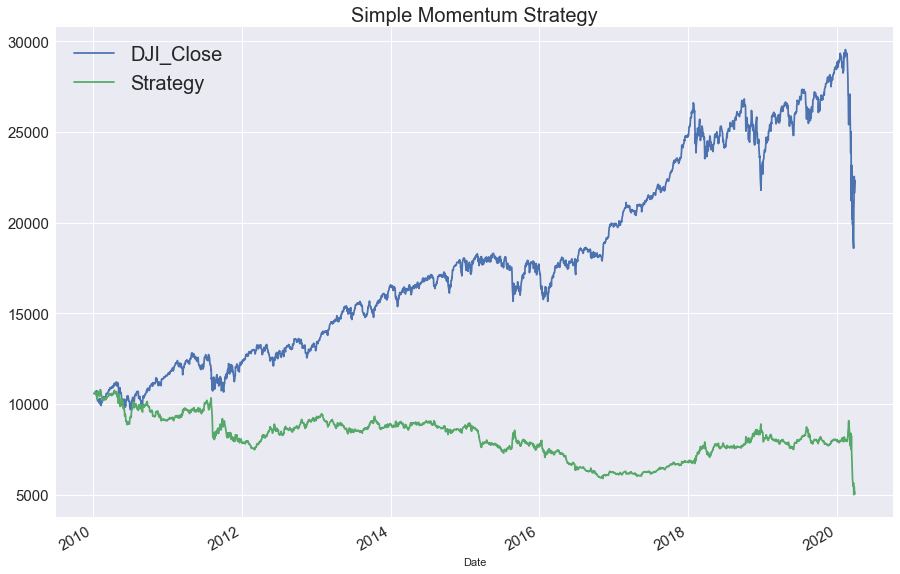

In [48]:
df[["DJI_Close", "Strategy"]].plot(figsize=(15,10), fontsize=15)
plt.title("Simple Momentum Strategy", fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [49]:
def summary_ann(returns):
    summary=returns.agg(["mean","std"]).T
    summary["Return"]=summary["Mean"]*252
    summary["Risk"]=summary["std"]*np.sqrt(252)
    summary.drop(columns=["mean", "std"], inplace=True)
    return summary

In [50]:
summary_ann(df[["DJI_Return","Strategy_Ret"]])

KeyError: 'Mean'

# Backtesting a simple Contrarian Strategy


In [ ]:
__Strategies__:

In [ ]:
-__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

In [ ]:
-__Simple Contrarian__ (Strategy to be tested): <br>
__a) Short Selling (-1)__ DJI tomorrow if today´s return was __positive__ <br>
__b) Investing (+1)__ into DJI tomorrow if today´s return was __negative__

In [ ]:
data

In [ ]:
df=data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns=["DJI_Close", "DJI_Return"]
df.dropna(inplace=True)
df

In [ ]:
df["Position"]=-np.sign(df["DJI_Return"])

In [ ]:
df

In [ ]:
df["Strategy_Ret"]=df["Position"].shift()*df["DJI_Return"]

In [ ]:
df

In [ ]:
df["Strategy"]=df.Strategy_Ret.add(1, fill_value=0).cumprod()*df.iloc[0,0]

In [ ]:
df

In [ ]:
df[["DJI_Close","Strategy_Ret"]].plot(figsize=(15,10), fontsize=15)
plt.legend(fontsize=15)
plt.title("Simple Contrarian Strategy", fontsize=20)
plt.show()

In [ ]:
summary_ann(df[["DJI_Return","Strategy_Ret"]])

# More complex Strategies & Backtesting vs. Fitting


In [ ]:
data

In [ ]:
df=data.loc["2010":, "Close"].to_frame()
df["DJI_Return"]=df.Close.pct_change()
df.columns=["DJI_Close","DJI_Return"]
df.dropna(inplace=True)
df



In [ ]:
df.DJI_Close.rolling(window=50).mean()

In [ ]:
df["SMA50"]=df.DJI_Close.rolling(window=50).mean()

In [ ]:
df[["DJI_Close","SMA50"]].plot(figsize=(15,10), fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
df["SMA200"]=df.DJI_Close.rolling(window=200).mean()

In [ ]:
df

In [19]:
df[["SMA50","SMA200"]].plot(figsize=(15,10), fontsize=15)
plt.legend(fontsize=15)
plt.show()

KeyError: "None of [Index(['SMA50', 'SMA200'], dtype='object')] are in the [columns]"

In [51]:
df.dropna()

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
2010-01-12,10627.259766,-0.003444,-1.0,-0.003444,10623.922628
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145


In [52]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145


# Simple Moving Averages (Part 2)


In [ ]:
__Strategies__:

In [ ]:
-__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

In [53]:
df["Position"]=np.sign(df.SMA50.sub(df.SMA200))

AttributeError: 'DataFrame' object has no attribute 'SMA50'

In [54]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145


In [55]:
df[["SMA50", "SMA200", "Position"]].plot(figsize=(15,10), secondary_y="Position", fontsize=15)
plt.show()

KeyError: "['SMA200', 'SMA50'] not in index"

In [ ]:
df["Strategy_Ret"]= df["Positon"].shift()*df["DJI_Return"]

In [56]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145


In [ ]:
df["Strategy"]=df.Strategy_Ret.add(1, fill_value=0).cumprod()*df.iloc[0,0]

In [57]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145


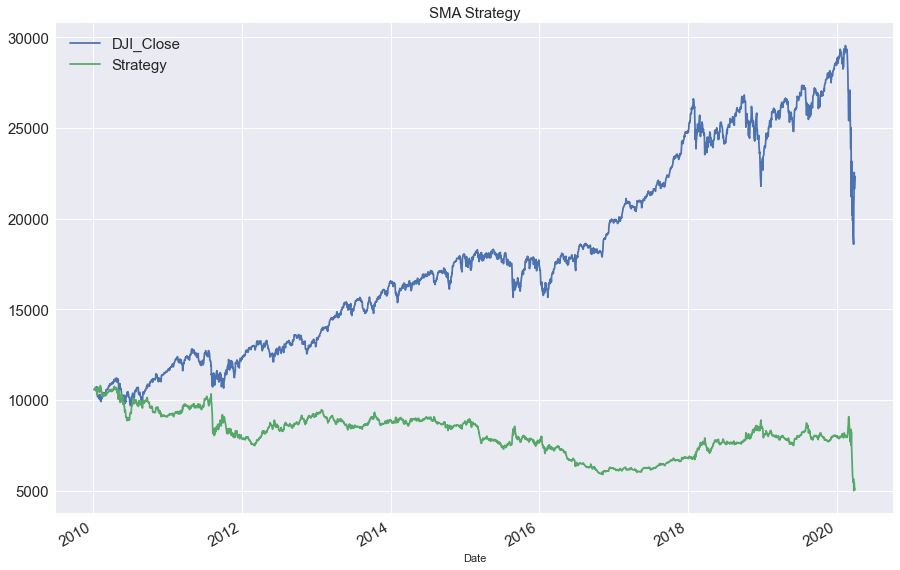

In [58]:
df[["DJI_Close","Strategy"]].plot(figsize=(15,10), fontsize=15)
plt.legend(fontsize=15)
plt.title("SMA Strategy", fontsize=15)
plt.show()

In [59]:
summary_ann(df[["DJI_Return","Strategy_Ret"]])

KeyError: 'Mean'

In [60]:
df["Position"]=-np.sign(df.SMA50.sub(df.SMA200))


AttributeError: 'DataFrame' object has no attribute 'SMA50'

In [61]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145


In [62]:
df[["SMA50","SMA200"]].plot(figsize=(15,10), secondary_y="Position", fontsize=15)
plt.show()

KeyError: "None of [Index(['SMA50', 'SMA200'], dtype='object')] are in the [columns]"

In [63]:
df["Strategy_Ret"]=df["Position"].shift()*df["DJI_Return"]

In [64]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145


In [65]:
df["Strategy"]=df.Strategy_Ret.add(1, fill_value=0).cumprod()*df.iloc[0,0]

In [66]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145


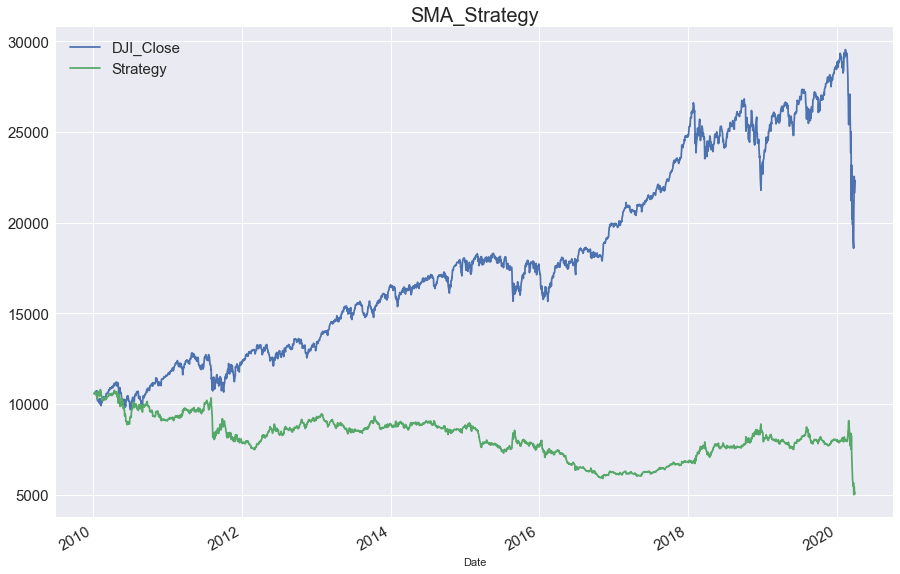

In [67]:
df[["DJI_Close","Strategy"]].plot(figsize=(15,10), fontsize=15)
plt.legend(fontsize=15)
plt.title("SMA_Strategy", fontsize=20)
plt.show()


In [68]:
summary_ann(df[["DJI_Return","Strategy_Ret"]])

KeyError: 'Mean'

# Backtesting the Perfect Strategy (...in case you can predict the future...)


In [69]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [70]:
df=data.loc["2010":, "Close"].to_frame()
df["DJI_Return"]=df.Close.pct_change()
df.columns=["DJI_Close", "DJI_Return"]
df.dropna(inplace=True)
df


,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [71]:
df["Position"]=np.sign(df["DJI_Return"])

In [72]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,1.0
2020-03-25,21200.550781,0.023938,1.0
2020-03-26,22552.169922,0.063754,1.0


In [73]:
df["Strategy_Ret"]=df["Position"]*df["DJI_Return"]

In [74]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,0.001128
2010-01-06,10573.679688,0.000157,1.0,0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,0.113650
2020-03-25,21200.550781,0.023938,1.0,0.023938
2020-03-26,22552.169922,0.063754,1.0,0.063754


In [75]:
df["Strategy"]=df.Strategy_Ret.add(1, fill_value=0).cumprod()*df.iloc[0,0]

In [76]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,0.001128,1.058395e+04
2010-01-06,10573.679688,0.000157,1.0,0.000157,1.058561e+04
2010-01-07,10606.860352,0.003138,1.0,0.003138,1.061883e+04
2010-01-08,10618.190430,0.001068,1.0,0.001068,1.063017e+04
2010-01-11,10663.990234,0.004313,1.0,0.004313,1.067602e+04
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,0.113650,1.856178e+11
2020-03-25,21200.550781,0.023938,1.0,0.023938,1.900611e+11
2020-03-26,22552.169922,0.063754,1.0,0.063754,2.021783e+11


AttributeError: 'Text' object has no property 'fontysize'

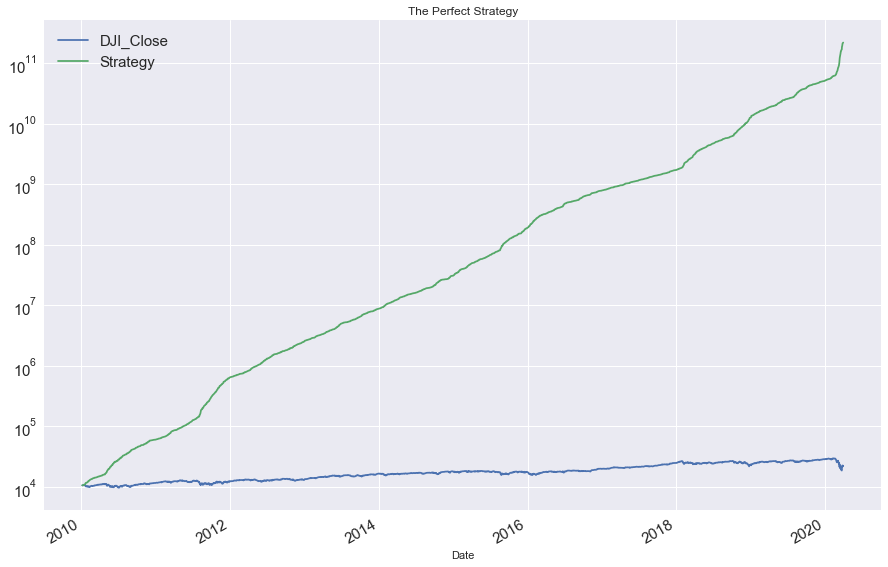

In [77]:
df[["DJI_Close", "Strategy"]].plot(figsize=(15,10), fontsize=15, logy=True)
plt.legend(fontsize=15)
plt.title("The Perfect Strategy", fontysize=20)
plt.show()

In [78]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

KeyError: 'Mean'